## MDH dataset - Exploratory Data Analysis 
### Salmonella isolates from humans



In [56]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MDH salmonella cases dataset
mdh_data = pd.read_excel('../data/raw/MDH_data_updated.xlsx')

In [57]:
# Summary of the dataset
mdh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968 entries, 0 to 2967
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Include?                 2968 non-null   object        
 1   State Lab ID             2968 non-null   object        
 2   PNUSA                    2968 non-null   object        
 3   BioSample ID             2882 non-null   object        
 4   SRA ID                   2821 non-null   object        
 5   Note(s)                  95 non-null     object        
 6   PNUSA Already Have?      1734 non-null   object        
 7   BioSample Already Have?  1734 non-null   object        
 8   SRA Already Have?        1696 non-null   object        
 9   Pathogen                 2968 non-null   object        
 10  Species/Serotype         2968 non-null   object        
 11  PDD/SPRAT(?) Serotype    1696 non-null   object        
 12  Specify
 Serotype        25 non-nu

In [58]:
# Preview the first few rows of the dataset
# Helps verify the data was loaded correctly
display(mdh_data.head())
# Display the total number of rows in the dataset
print(f"Number of rows: {len(mdh_data)}")

,Include?,State Lab ID,PNUSA,BioSample ID,SRA ID,Note(s),PNUSA Already Have?,BioSample Already Have?,SRA Already Have?,Pathogen,...,Age,Sex/Gender,Hospitalized?,Patient\n Outcome,Interviewed?,Intnl\n Travel,Travel Country,Outbreak?,Outbreak Name,Outbreak Type
0,No,H21-12726,PNUSAS234739,SAMN22160606,SRR16248883,NaN,Included,Included,Included,Salmonella,...,90,FEMALE,YES,ALIVE,YES,NO,NaN,NO,NaN,NaN
1,No,210127525,PNUSAS236895,SAMN22377482,SRR16477507,NaN,Included,Included,Included,Salmonella,...,51,FEMALE,YES,ALIVE,YES,NO,NaN,NO,NaN,NaN
2,No,210125439,PNUSAS236511,SAMN22377512,SRR16477535,NaN,Included,Included,Included,Salmonella,...,7,FEMALE,YES,ALIVE,YES,YES,Kenya,NO,NaN,NaN
3,No,210125671,PNUSAS236515,SAMN22377516,SRR16477549,NaN,Included,Included,Included,Salmonella,...,34,FEMALE,YES,ALIVE,YES,NO,NaN,NO,NaN,NaN
4,No,210127936,PNUSAS239116,SAMN22562706,SRR16569334,NaN,Included,Included,Included,Salmonella,...,44,FEMALE,YES,ALIVE,NO,NaN,NaN,NO,NaN,NaN


Number of rows: 2968


In [59]:
# Display the total count of null values for each column to identify missing data that may require cleaning or imputation
print("\nCount of null values in each column:")
mdh_data.isnull().sum()



Count of null values in each column:


Include?                      0
State Lab ID                  0
PNUSA                         0
BioSample ID                 86
SRA ID                      147
Note(s)                    2873
PNUSA Already Have?        1234
BioSample Already Have?    1234
SRA Already Have?          1272
Pathogen                      0
Species/Serotype              0
PDD/SPRAT(?) Serotype      1272
Specify\n Serotype         2943
Casedef                       0
Spec Coll\n Date              0
Spec\n Source                 0
City                          0
County                        0
Age                           0
Sex/Gender                    0
Hospitalized?                 6
Patient\n Outcome             6
Interviewed?                 14
Intnl\n Travel              639
Travel Country             2439
Outbreak?                     0
Outbreak Name              2594
Outbreak Type              2594
dtype: int64

In [ ]:
# Remove unnecessary rows - IIf Include? column equals 'no', remove the row
include = mdh_data.columns[0]
print(f"Removing rows where '{include}' equals 'no'")

# Apply filter: Exclude rows where the column value is 'no'
mdh_data_filtered = mdh_data[mdh_data[include].str.strip().str.lower() != 'no']

# Reset the index for a clean DataFrame
mdh_data_filtered.reset_index(drop=True, inplace=True)

# Display the filtered dataset summary
print(f"Filtered dataset shape: {mdh_data_filtered.shape}")
display(mdh_data_filtered.head())

mdh_data_filtered.columns.tolist()

Removing rows where 'Include?' equals 'no' (case-insensitive)...
Filtered dataset shape: (2697, 28)


,Include?,State Lab ID,PNUSA,BioSample ID,SRA ID,Note(s),PNUSA Already Have?,BioSample Already Have?,SRA Already Have?,Pathogen,...,Age,Sex/Gender,Hospitalized?,Patient\n Outcome,Interviewed?,Intnl\n Travel,Travel Country,Outbreak?,Outbreak Name,Outbreak Type
0,Yes,H21-12238,PNUSAS233281,SAMN22035861,SRR16185452,NaN,Included,Included,Included,Salmonella,...,30,MALE,NO,ALIVE,YES,NO,NaN,NO,NaN,NaN
1,Yes,H21-11403,PNUSAS233284,SAMN22035855,SRR16185520,NaN,Included,Included,Included,Salmonella,...,0,MALE,NO,ALIVE,NO,NaN,NaN,NO,NaN,NaN
2,Yes,H21-12511,PNUSAS233278,SAMN22035185,SRR16185522,NaN,Included,Included,Included,Salmonella,...,14,MALE,YES,ALIVE,YES,NO,NaN,YES,"S. I 4,5,12i- salame sticks",FOODBORNE
3,Yes,H21-11308,PNUSAS233282,SAMN22035182,SRR16186773,NaN,Included,Included,Included,Salmonella,...,1,MALE,NO,ALIVE,NO,NaN,NaN,NO,NaN,NaN
4,Yes,H21-11914,PNUSAS233283,SAMN22034158,SRR16191579,NaN,Included,Included,Included,Salmonella,...,31,FEMALE,NO,ALIVE,YES,NO,NaN,NO,NaN,NaN


['Include?',
 'State Lab ID',
 'PNUSA',
 'BioSample ID',
 'SRA ID',
 'Note(s)',
 'PNUSA Already Have?',
 'BioSample Already Have?',
 'SRA Already Have?',
 'Pathogen',
 'Species/Serotype',
 'PDD/SPRAT(?) Serotype',
 'Specify\n Serotype',
 'Casedef',
 'Spec Coll\n Date',
 'Spec\n Source',
 'City',
 'County',
 'Age',
 'Sex/Gender',
 'Hospitalized?',
 'Patient\n Outcome',
 'Interviewed?',
 'Intnl\n Travel',
 'Travel Country',
 'Outbreak?',
 'Outbreak Name',
 'Outbreak Type']

In [61]:
# Show unique values
print("\nUnique values in Spec Source column:")
print(mdh_data['Spec\n Source'].unique())

print("\nUnique values in Sex/Gender column:")
print(mdh_data['Sex/Gender'].unique())

print("\nUnique values in Hospitalized? column:")
print(mdh_data['Hospitalized?'].unique())

print("\nUnique values in Patient Outcome  column:")
print(mdh_data['Patient\n Outcome'].unique())

print("\nUnique values in Interviewed? column:")
print(mdh_data['Interviewed?'].unique())

print("\nUnique values in Intnl\n Travel column:")
print(mdh_data['Intnl\n Travel'].unique())

print("\nUnique values in Travel Country' column:")
print(mdh_data['Travel Country'].unique())

print("\nUnique values in Outbreak? column:")
print(mdh_data['Outbreak?'].unique())

print("\nUnique values in Outbreak Name column:")
print(mdh_data['Outbreak Name'].unique())

print("\nUnique values in Outbreak Type column:")
print(mdh_data['Outbreak Type'].unique())



Unique values in Spec Source column:
['Stool' 'Blood' 'Urine' 'Other' 'Wound' 'Peritoneal\n fluid' 'Bone'
 'Gallbladder']

Unique values in Sex/Gender column:
['FEMALE' 'MALE' 'UNKNOWN']

Unique values in Hospitalized? column:
['YES' 'NO' nan]

Unique values in Patient Outcome  column:
['ALIVE' 'DEAD' nan]

Unique values in Interviewed? column:
['YES' 'NO' nan]

Unique values in Intnl
 Travel column:
['NO' 'YES' nan 'UNKNOWN']

Unique values in Travel Country' column:
[nan 'Kenya' 'Mexico' 'Dominican Republic' 'Jamaica'
 'United Arab Emirates' 'India' 'Malaysia' 'Thailand' 'Argentina'
 'Costa Rica' 'Peru' 'Indonesia|Thailand' 'Indonesia' 'Pakistan' 'Italy'
 'Hungary' 'Barbados' 'Egypt' 'South Africa' 'Algeria' 'Canada' 'Cambodia'
 'Guatemala' 'Togo' 'Israel' 'Saudi Arabia' 'Honduras' 'Ethiopia' 'Spain'
 'Morocco' 'Viet Nam' 'Philippines' 'Chile|Mexico' 'Belize' 'Curacao'
 'Cayman Islands|Belize|Honduras|Mexico' 'Ecuador'
 'Ireland|United Kingdom' 'Colombia' 'United Kingdom|Spain'
 'Gr

In [62]:
# Show top 5 most common ages
top_ages = mdh_data['Age'].value_counts().head(5)
print("Top 5 most common ages:")
print(top_ages)

# Show the range of unique ages
unique_ages = sorted(mdh_data['Age'].unique())
print(f"*** >>> 'Age' column range from {min(unique_ages)} to {max(unique_ages)}.")

mdh_data['Age'].value_counts()


Top 5 most common ages:
Age
0     120
1      90
3      55
57     54
64     53
Name: count, dtype: int64
*** >>> 'Age' column range from 0 to 101.


Age
0      120
1       90
3       55
57      54
64      53
      ... 
101      1
99       1
96       1
98       1
94       1
Name: count, Length: 100, dtype: int64

In [63]:
# Count unique values
num_unique_ages = len(unique_ages)
print(f"The 'Age' column has {num_unique_ages} unique values.")
# Top 5
print("Here are the first 10 unique values:")
print(unique_ages[:10])


# last 5 values
print("The last 5 unique values in the 'Age' column are:")
print(unique_ages[-10:])



The 'Age' column has 100 unique values.
Here are the first 10 unique values:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
The last 5 unique values in the 'Age' column are:
[90, 91, 92, 93, 94, 95, 96, 98, 99, 101]


### Visualization 

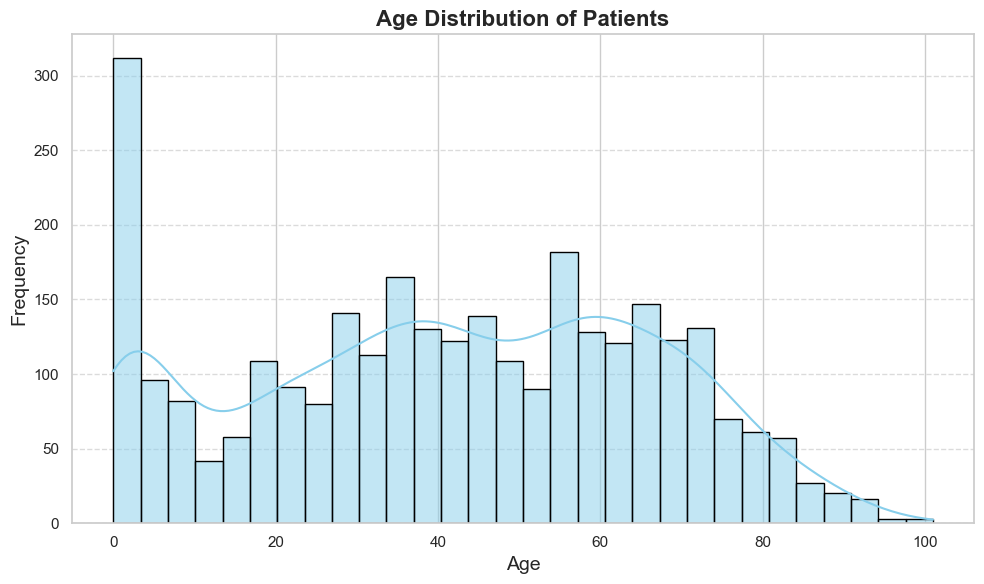

In [64]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=mdh_data, x='Age', bins=30, kde=True, color='skyblue', edgecolor='black')

# title and labels
plt.title("Age Distribution of Patients", fontsize=16, weight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show
plt.show()


Hospitalized?
NO     2226
YES     736
Name: count, dtype: int64


/var/folders/6b/k4_0wvgs16zf55t_7w38pqcr0000gn/T/ipykernel_16293/2074937675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mdh_data, x='Hospitalized?', palette='viridis')


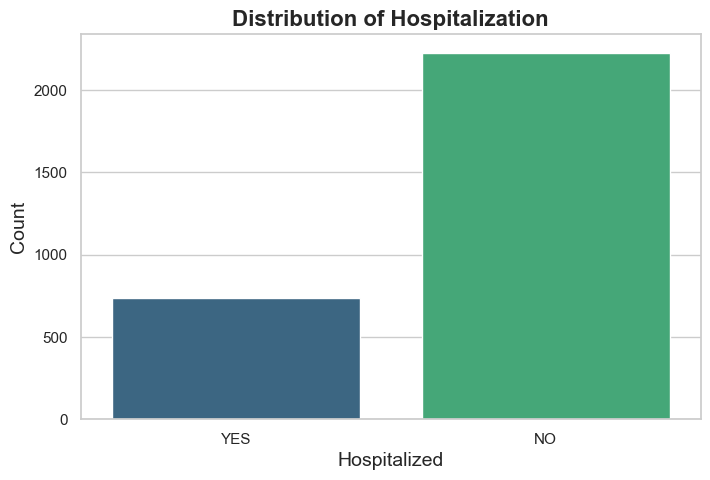

In [71]:
print(mdh_data['Hospitalized?'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=mdh_data, x='Hospitalized?', palette='viridis')
plt.title("Distribution of Hospitalization", fontsize=16, weight='bold')
plt.xlabel("Hospitalized", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()


/var/folders/6b/k4_0wvgs16zf55t_7w38pqcr0000gn/T/ipykernel_16293/793092998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=mdh_data, x='Spec\n Source', order=mdh_data['Spec\n Source'].value_counts().index, palette='bright')


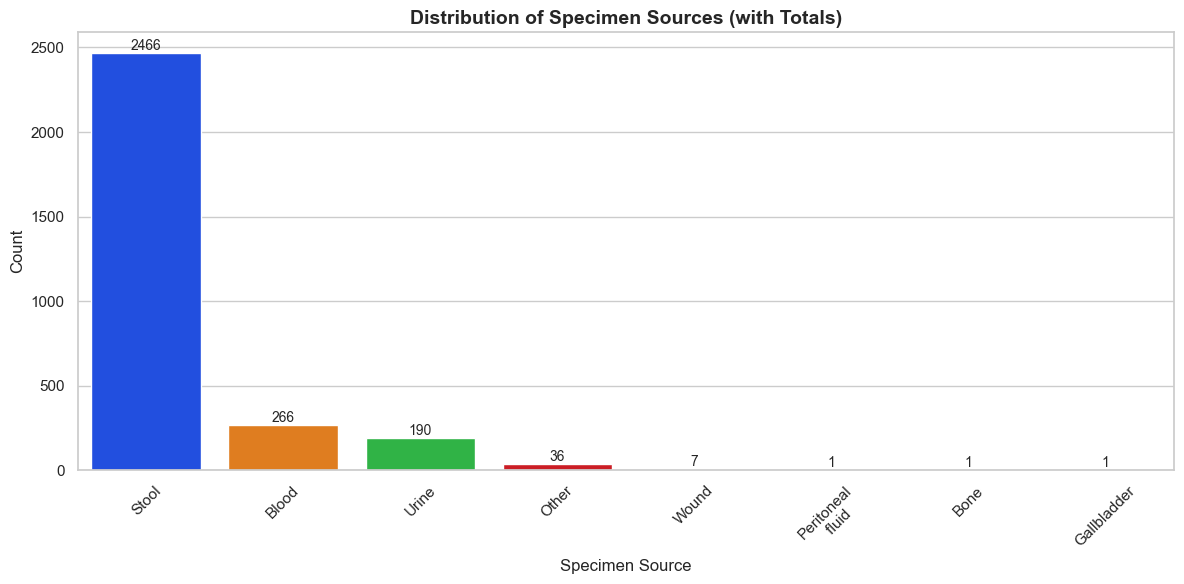

In [66]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=mdh_data, x='Spec\n Source', order=mdh_data['Spec\n Source'].value_counts().index, palette='bright')

for bar in ax.patches:
    ax.annotate(
        text=f"{int(bar.get_height())}",  #height (count)
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position at the top of the bar
        ha='center', va='bottom', fontsize=10  # Align center and set font size
    )

plt.title("Distribution of Specimen Sources (with Totals)", fontsize=14, weight='bold')
plt.xlabel("Specimen Source", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# plt.figure(figsize=(10, 6))
# sns.countplot(data=mdh_data, x='Spec\n Source', order=mdh_data['Spec\n Source'].value_counts().index, palette='hsv')
# plt.title("Distribution of Specimen Sources", fontsize=16, weight='bold')
# plt.xlabel("Specimen Source", fontsize=14)
# plt.ylabel("Count", fontsize=14)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


Age distribution for hospitalized vs. non-hospitalized groups

/var/folders/6b/k4_0wvgs16zf55t_7w38pqcr0000gn/T/ipykernel_16293/3132162014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mdh_data, x='Hospitalized?', y='Age', palette='pastel')


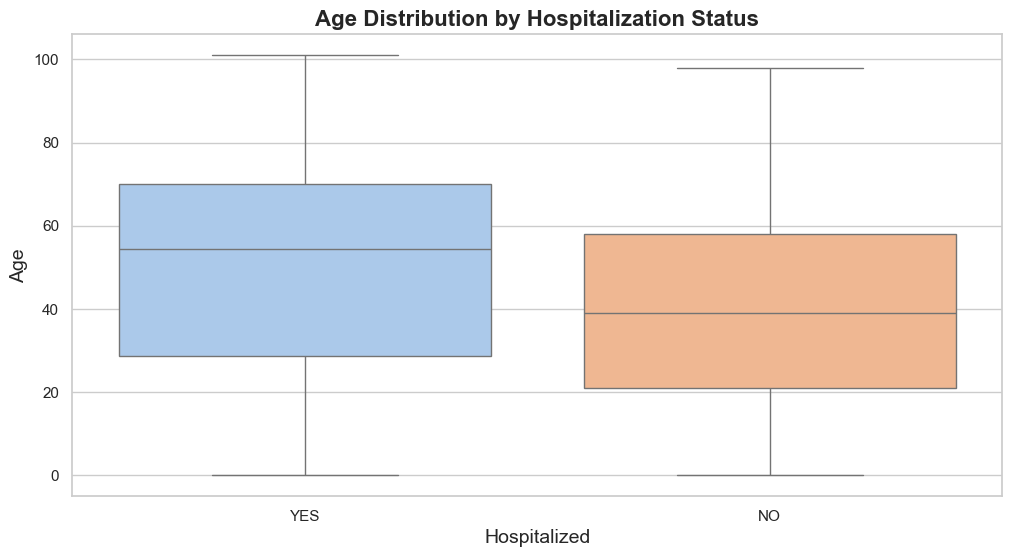

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=mdh_data, x='Hospitalized?', y='Age', palette='pastel')
plt.title("Age Distribution by Hospitalization Status", fontsize=16, weight='bold')
plt.xlabel("Hospitalized", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.show()


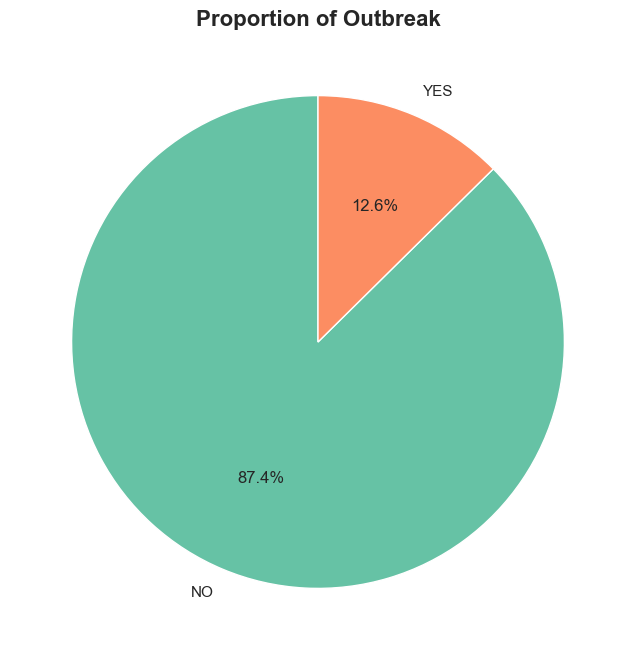

In [70]:
outbreak_counts = mdh_data['Outbreak?'].value_counts()
plt.figure(figsize=(8, 8))
outbreak_counts.plot.pie(
    autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'], labels=outbreak_counts.index
)
plt.title("Proportion of Outbreak", fontsize=16, weight='bold')
plt.ylabel("") 
plt.show()


Analyzing the relationship between the spec source and hospitalization

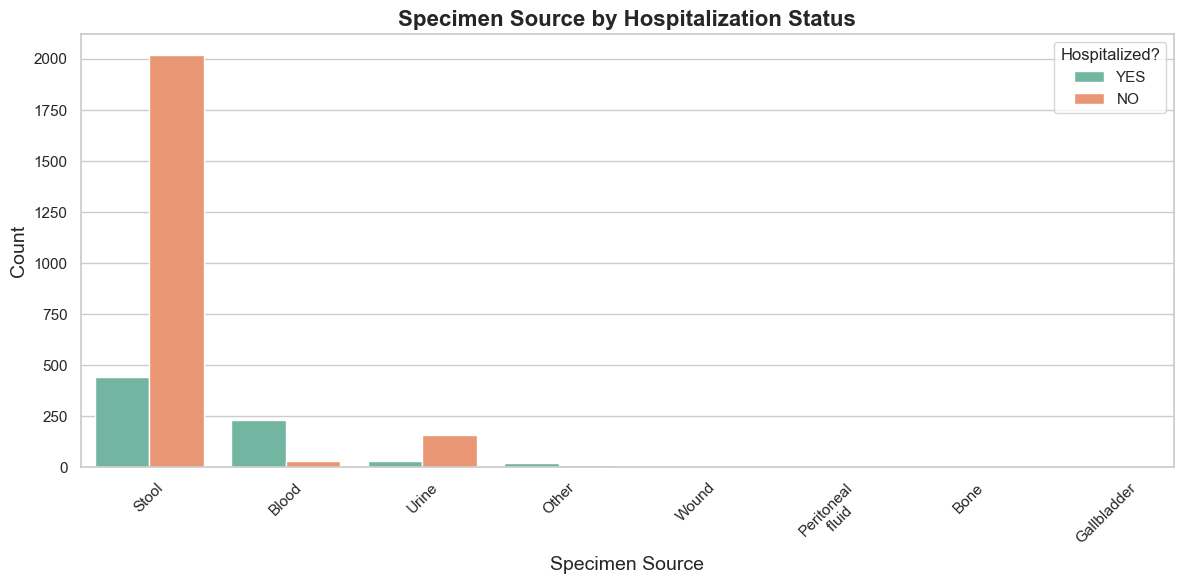

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(data=mdh_data, x='Spec\n Source', hue='Hospitalized?', palette='Set2',
              order=mdh_data['Spec\n Source'].value_counts().index)

# Add labels and title
plt.title("Specimen Source by Hospitalization Status", fontsize=16, weight='bold')
plt.xlabel("Specimen Source", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Proportion of hospitalized patients broken down by age

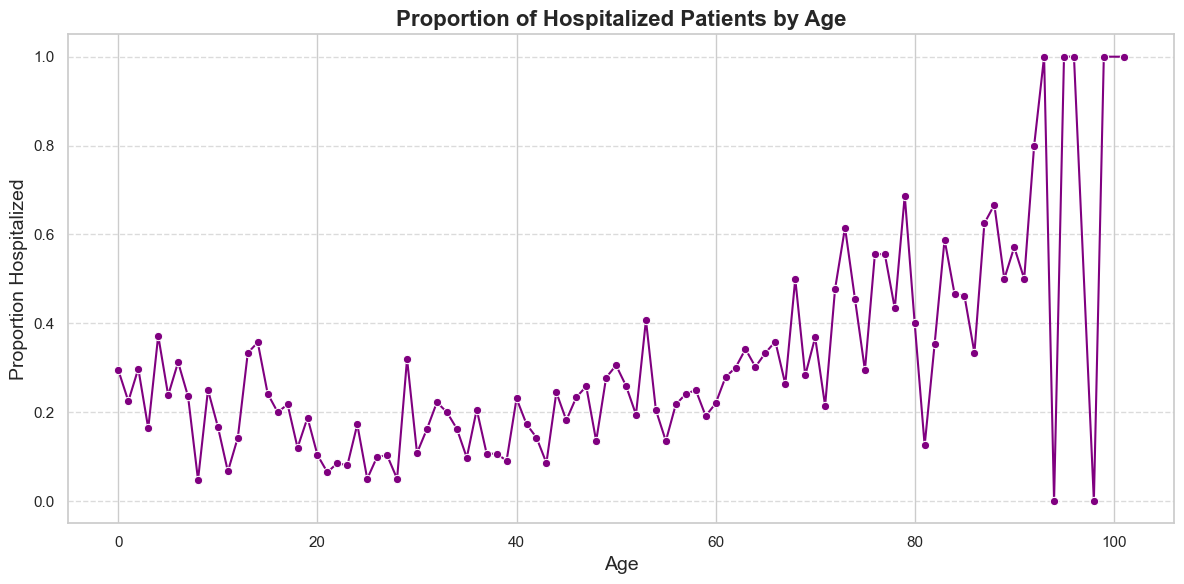

In [54]:
# Calculate proportions
hospitalized_by_age = (
    mdh_data.groupby('Age')['Hospitalized?']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)  # Fill missing values with 0
)

# Reset the index for plotting
hospitalized_by_age.reset_index(inplace=True)

# Rename columns for clarity
hospitalized_by_age.columns = ['Age', 'Not Hospitalized', 'Hospitalized']

# Plot proportion of hospitalized by age
plt.figure(figsize=(12, 6))
sns.lineplot(data=hospitalized_by_age, x='Age', y='Hospitalized', marker='o', color='purple')

# Add labels and title
plt.title("Proportion of Hospitalized Patients by Age", fontsize=16, weight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Proportion Hospitalized", fontsize=14)

# Add grid and adjust layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()